Epoch 1/10


C:\Users\Sudha\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8701 - loss: 0.4387 - val_accuracy: 0.9620 - val_loss: 0.1239
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9689 - loss: 0.1069 - val_accuracy: 0.9710 - val_loss: 0.0894
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9781 - loss: 0.0709 - val_accuracy: 0.9753 - val_loss: 0.0809
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9831 - loss: 0.0539 - val_accuracy: 0.9761 - val_loss: 0.0799
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0405 - val_accuracy: 0.9777 - val_loss: 0.0831
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9900 - loss: 0.0322 - val_accuracy: 0.9750 - val_loss: 0.0926
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0288 - val_accuracy: 0.9797 - val_loss: 0.0810
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accur

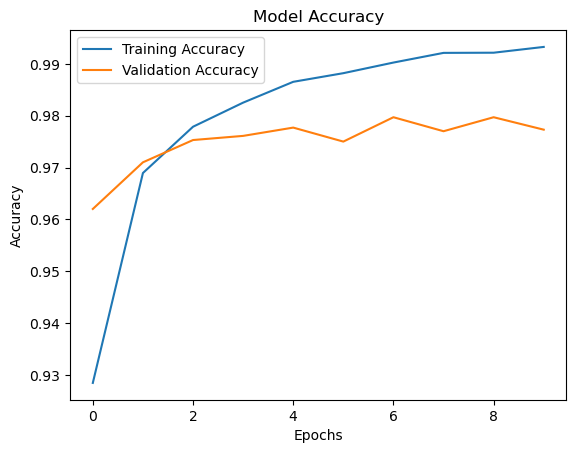

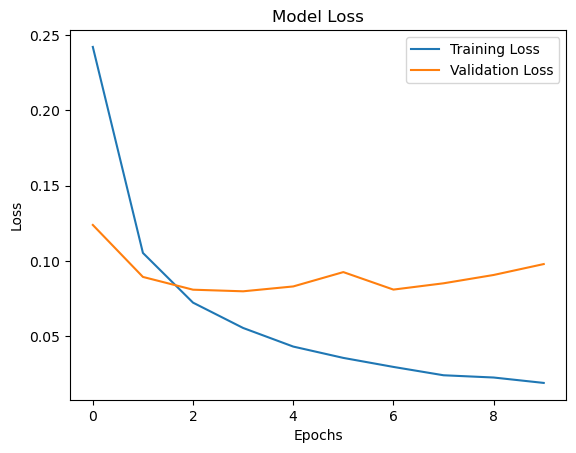

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


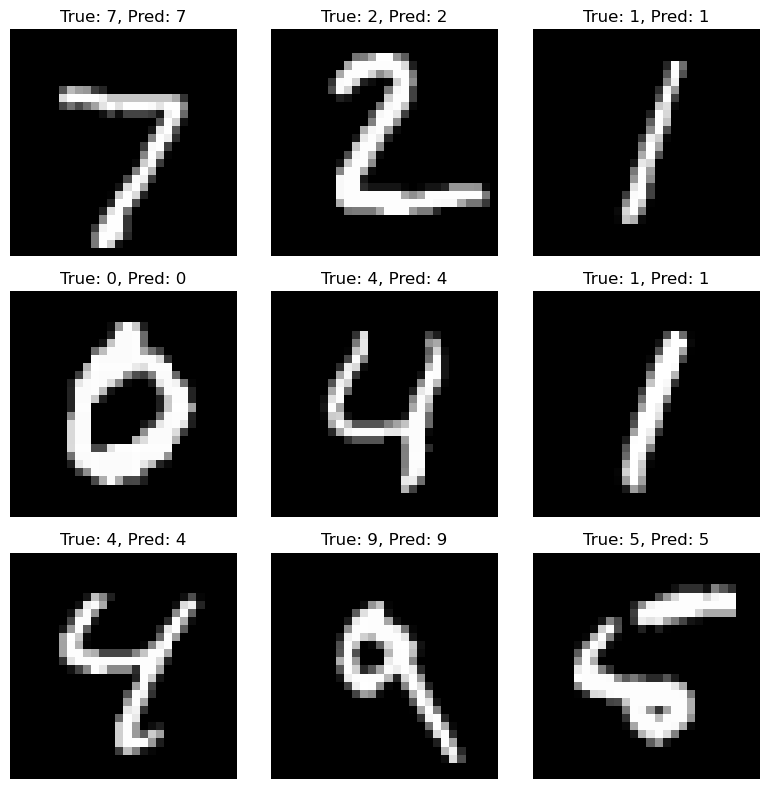

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 2: Build the MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 2D image into a 1D vector
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(64, activation='relu'),   # Fully connected layer with 64 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    epochs=10, 
                    batch_size=32)

# Step 4: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 5: Visualize training performance
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Visualize predictions
# Predict on test set
predictions = np.argmax(model.predict(x_test), axis=-1)

# Visualize some predictions
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title(f"True: {np.argmax(y_test[i])}, Pred: {predictions[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


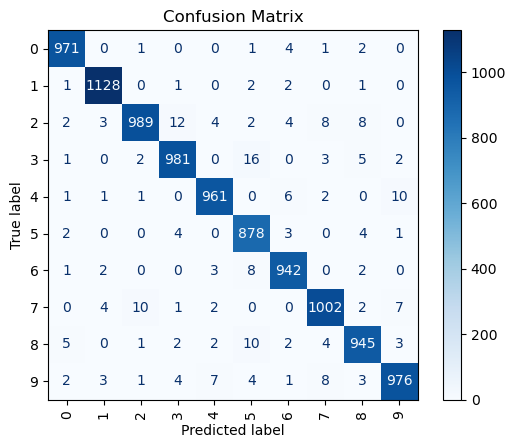

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.95      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
predictions = np.argmax(model.predict(x_test), axis=-1)
true_labels = np.argmax(y_test, axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


from sklearn.metrics import classification_report

# Predict on the test set
predictions = np.argmax(model.predict(x_test), axis=-1)
true_labels = np.argmax(y_test, axis=-1)

# Generate classification report
report = classification_report(true_labels, predictions, target_names=[str(i) for i in range(10)])
print("Classification Report:\n")
print(report)
